In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

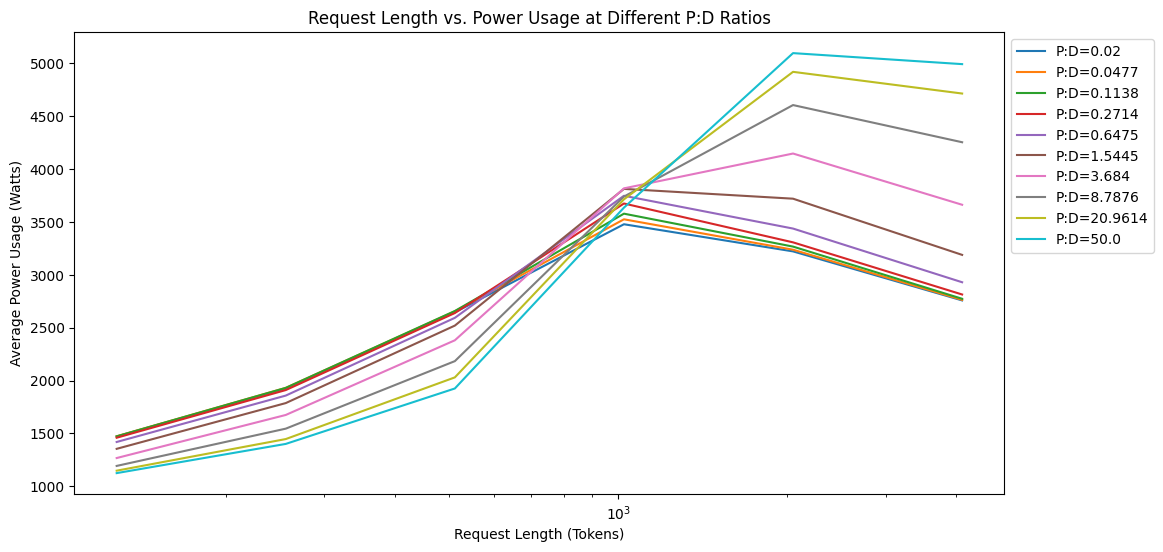

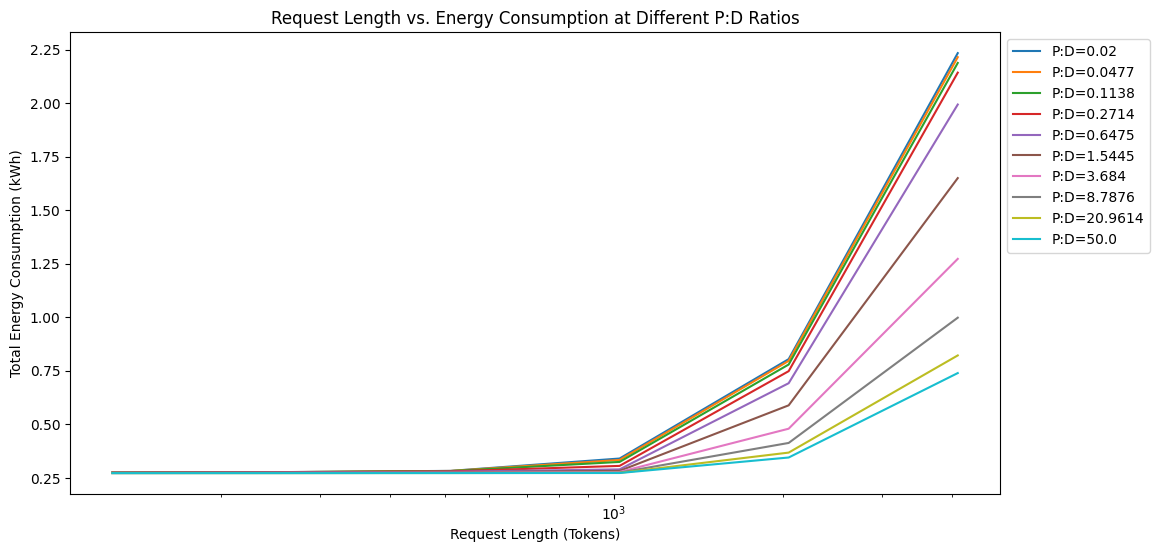

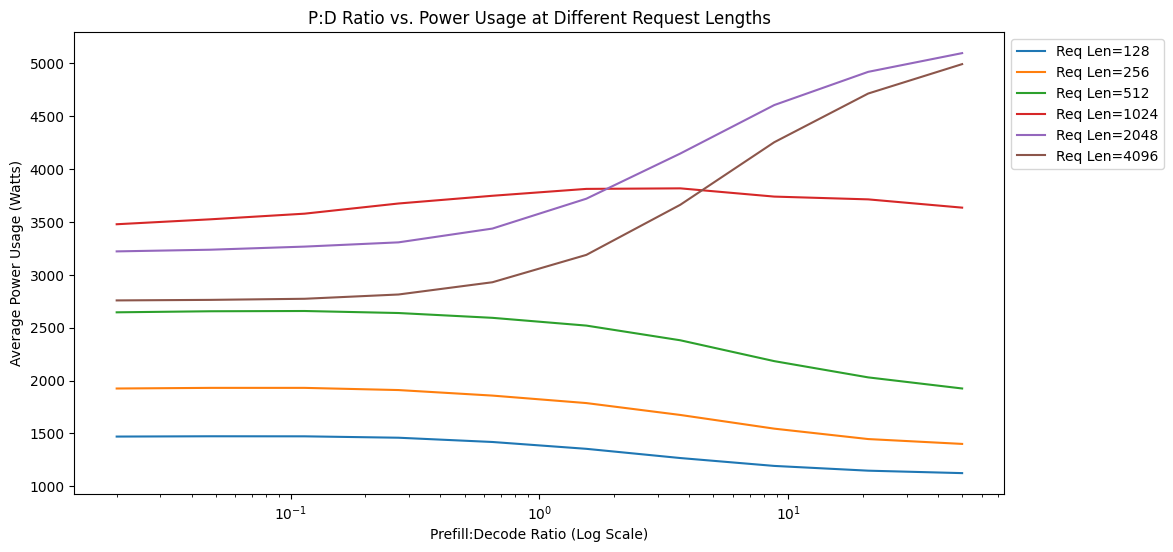

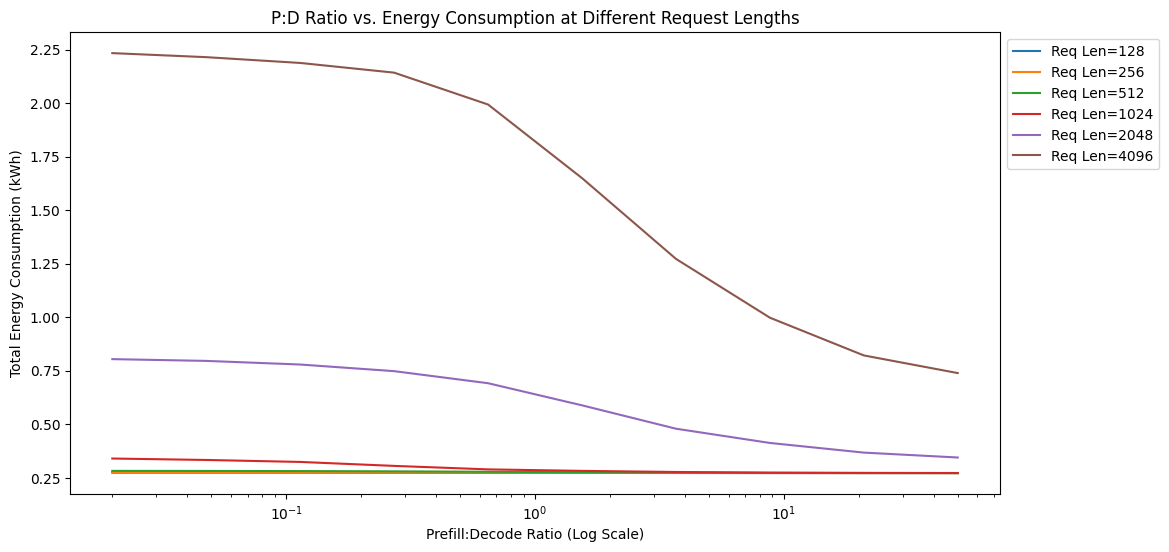

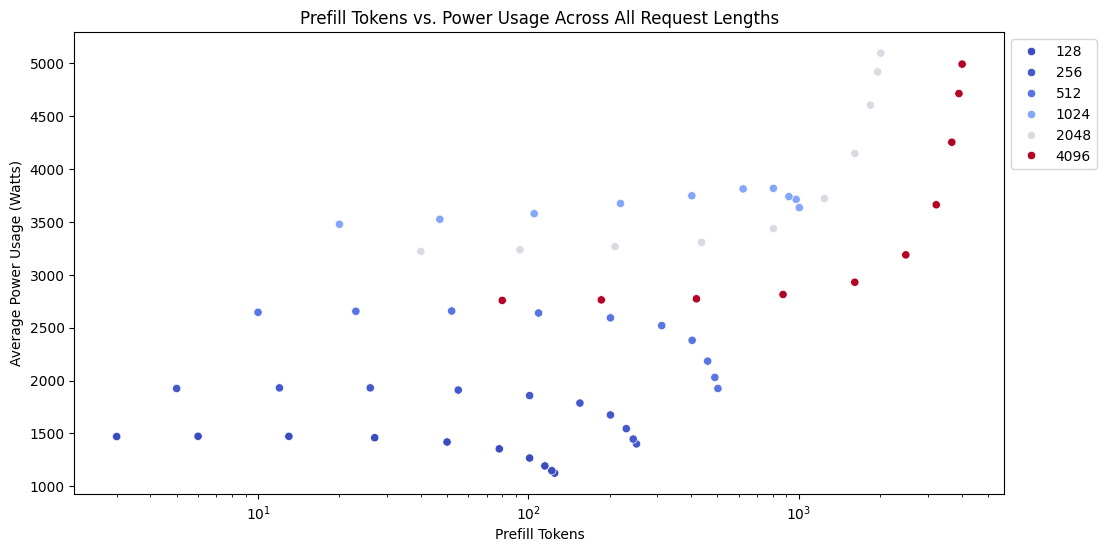

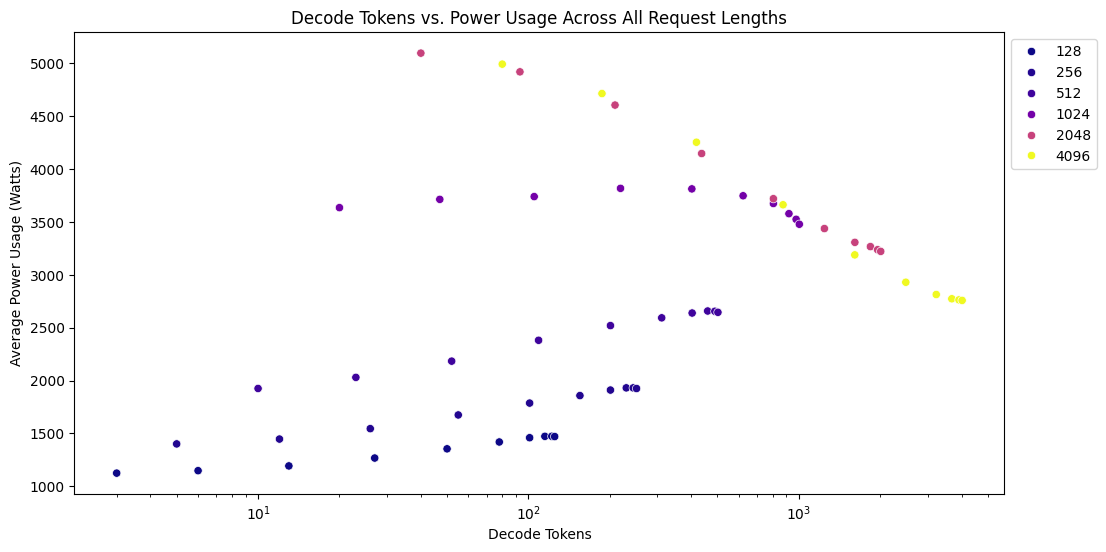

In [2]:
# Load the CSV file
file_path = "/Users/mirayozcan/Desktop/vidur_copy/vidur/simulator_output/exp2-pdratio-inpseq-power-energy/experiment_results_summary.csv"
df = pd.read_csv(file_path)

# Convert relevant columns to numeric (if they are not already)
numeric_cols = [
    "request_length", "prefill_tokens", "decode_tokens", "prefill_decode_ratio", 
    "average_power_watts", "peak_power_watts", "total_energy_kwh"
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

# Drop rows with missing values (if any)
df = df.dropna()

# Extract unique values from dataset
all_request_lengths = sorted(df["request_length"].unique())
all_pd_ratios = sorted(df["prefill_decode_ratio"].unique())

### 1️⃣ Observing Effect of Request Length on Power Usage and Energy at Each P:D Ratio ###
plt.figure(figsize=(12, 6))
for ratio in all_pd_ratios:
    subset = df[df["prefill_decode_ratio"] == ratio]
    sns.lineplot(x=subset["request_length"], y=subset["average_power_watts"], label=f"P:D={ratio}")

plt.xlabel("Request Length (Tokens)")
plt.ylabel("Average Power Usage (Watts)")
plt.title("Request Length vs. Power Usage at Different P:D Ratios")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.xscale("log")  # Log scale for better clarity
plt.show()

plt.figure(figsize=(12, 6))
for ratio in all_pd_ratios:
    subset = df[df["prefill_decode_ratio"] == ratio]
    sns.lineplot(x=subset["request_length"], y=subset["total_energy_kwh"], label=f"P:D={ratio}")

plt.xlabel("Request Length (Tokens)")
plt.ylabel("Total Energy Consumption (kWh)")
plt.title("Request Length vs. Energy Consumption at Different P:D Ratios")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.xscale("log")  # Log scale for better clarity
plt.show()

### 2️⃣ Observing Effect of P:D Ratio on Power Usage and Energy at Each Request Length (Log Scale for P:D) ###
plt.figure(figsize=(12, 6))
for req_length in all_request_lengths:
    subset = df[df["request_length"] == req_length]
    sns.lineplot(x=subset["prefill_decode_ratio"], y=subset["average_power_watts"], label=f"Req Len={req_length}")

plt.xlabel("Prefill:Decode Ratio (Log Scale)")
plt.ylabel("Average Power Usage (Watts)")
plt.title("P:D Ratio vs. Power Usage at Different Request Lengths")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.xscale("log")  # Log scale for P:D Ratio
plt.show()

plt.figure(figsize=(12, 6))
for req_length in all_request_lengths:
    subset = df[df["request_length"] == req_length]
    sns.lineplot(x=subset["prefill_decode_ratio"], y=subset["total_energy_kwh"], label=f"Req Len={req_length}")

plt.xlabel("Prefill:Decode Ratio (Log Scale)")
plt.ylabel("Total Energy Consumption (kWh)")
plt.title("P:D Ratio vs. Energy Consumption at Different Request Lengths")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.xscale("log")  # Log scale for P:D Ratio
plt.show()

### 3️⃣ Prefill Tokens vs Power Usage Across All Request Lengths ###
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="prefill_tokens", y="average_power_watts", hue="request_length", palette="coolwarm")
plt.xlabel("Prefill Tokens")
plt.ylabel("Average Power Usage (Watts)")
plt.title("Prefill Tokens vs. Power Usage Across All Request Lengths")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.xscale("log")  # Log scale for Prefill Tokens
plt.show()

### 4️⃣ Decode Tokens vs Power Usage Across All Request Lengths ###
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="decode_tokens", y="average_power_watts", hue="request_length", palette="plasma")
plt.xlabel("Decode Tokens")
plt.ylabel("Average Power Usage (Watts)")
plt.title("Decode Tokens vs. Power Usage Across All Request Lengths")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.xscale("log")  # Log scale for Decode Tokens
plt.show()

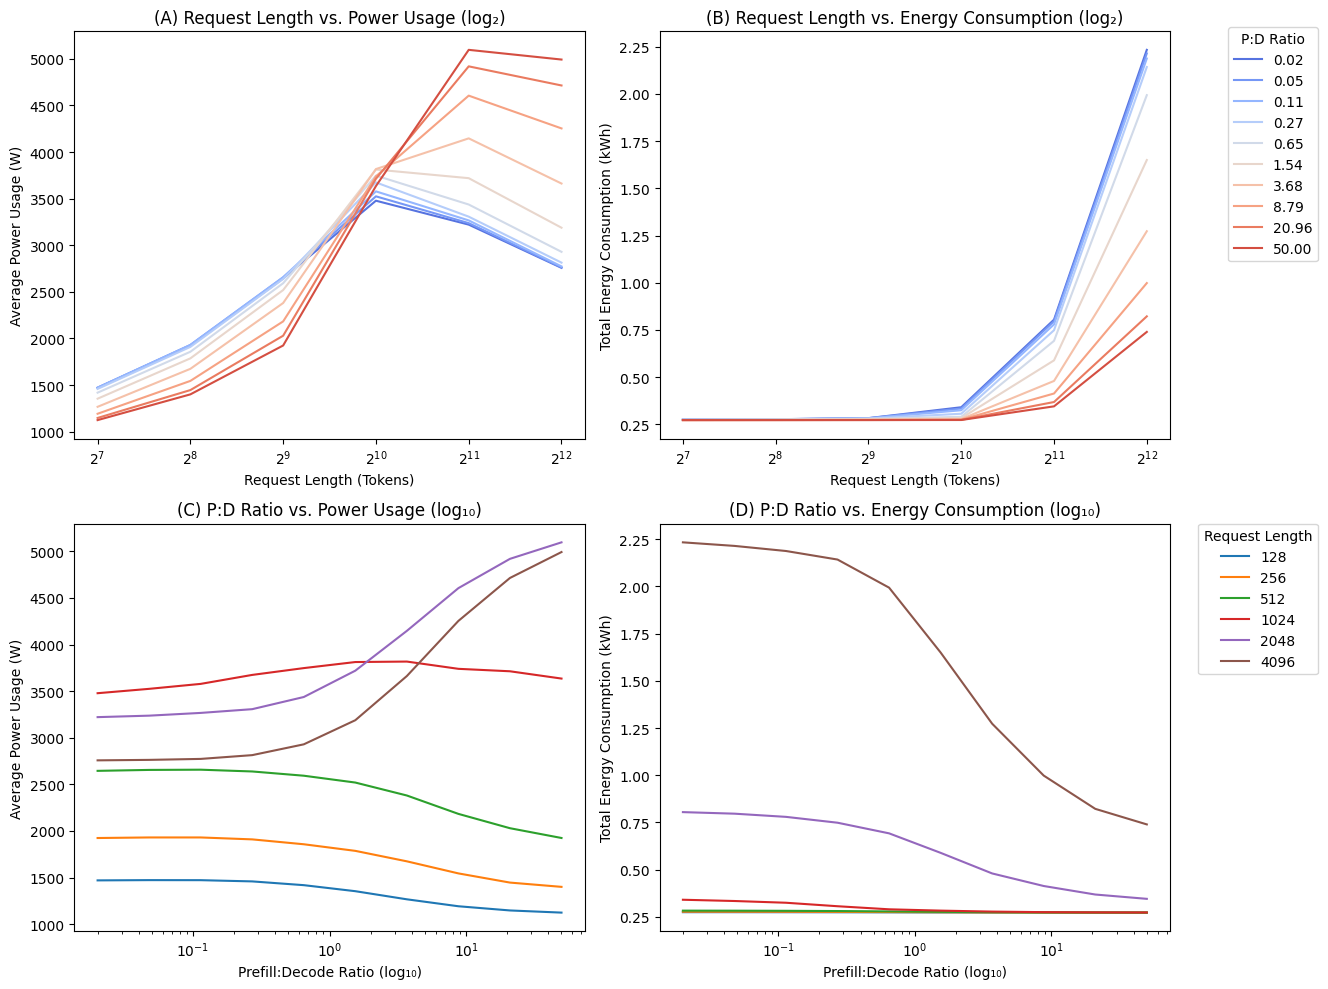

In [3]:
# Convert relevant columns to numeric
numeric_cols = [
    "request_length", "prefill_tokens", "decode_tokens",
    "prefill_decode_ratio", "average_power_watts",
    "peak_power_watts", "total_energy_kwh"
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")
df = df.dropna()

# Ensure all P:D ratios are included in the dataset
all_pd_ratios = sorted(df["prefill_decode_ratio"].unique())
all_request_lengths = sorted(df["request_length"].unique())

# Updated function to use MathText for exponents
def label_power_of_two(x: float) -> str:
    """
    If x is a power of two (within a small epsilon),
    return a LaTeX-style label like $2^{7}$.
    Otherwise, return the integer value of x as a string.
    """
    if x > 0:
        log2_val = np.log2(x)
        rounded = int(round(log2_val))
        # Check if x is extremely close to an integer power of 2
        if abs(log2_val - rounded) < 0.0001:
            # Return something like $2^{7}$
            return rf"$2^{{{rounded}}}$"
    # If it's not a perfect power of two, just show the numeric value
    return str(int(x))

# Create a new column with exactly two decimal places for P:D ratios
df["prefill_decode_ratio_2dec"] = df["prefill_decode_ratio"].apply(lambda x: f"{x:.2f}")

# Sort the ratios as strings (so your hue_order lines up nicely)
all_pd_ratios_str = [f"{r:.2f}" for r in all_pd_ratios]

# Define a distinct color palette for P:D ratios and request lengths
pd_ratio_colors = sns.color_palette("coolwarm", n_colors=len(all_pd_ratios_str))
request_length_colors = sns.color_palette("tab10", n_colors=len(all_request_lengths))

# Create the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

############################################
# (A) Request Length vs. Power Usage (log₂)
############################################
sns.lineplot(
    ax=axes[0, 0],
    data=df,
    x="request_length",
    y="average_power_watts",
    hue="prefill_decode_ratio_2dec",
    hue_order=all_pd_ratios_str,
    palette=pd_ratio_colors,
    legend=False  # Disable individual legends
)
axes[0, 0].set_xscale("log", base=2)
axes[0, 0].set_xlabel("Request Length (Tokens)")
axes[0, 0].set_ylabel("Average Power Usage (W)")
axes[0, 0].set_title("(A) Request Length vs. Power Usage (log₂)")

axes[0, 0].set_xticks(all_request_lengths)
axes[0, 0].set_xticklabels([label_power_of_two(x) for x in all_request_lengths])

###############################################
# (B) Request Length vs. Energy (log₂)
###############################################
sns.lineplot(
    ax=axes[0, 1],
    data=df,
    x="request_length",
    y="total_energy_kwh",
    hue="prefill_decode_ratio_2dec",
    hue_order=all_pd_ratios_str,
    palette=pd_ratio_colors,
    legend=False  # Disable individual legends
)
axes[0, 1].set_xscale("log", base=2)
axes[0, 1].set_xlabel("Request Length (Tokens)")
axes[0, 1].set_ylabel("Total Energy Consumption (kWh)")
axes[0, 1].set_title("(B) Request Length vs. Energy Consumption (log₂)")

axes[0, 1].set_xticks(all_request_lengths)
axes[0, 1].set_xticklabels([label_power_of_two(x) for x in all_request_lengths])

##################################################
# (C) P:D Ratio vs. Power Usage (log₁₀)
##################################################
sns.lineplot(
    ax=axes[1, 0],
    data=df,
    x="prefill_decode_ratio",
    y="average_power_watts",
    hue="request_length",
    hue_order=all_request_lengths,
    palette=request_length_colors,
    legend=False  # Disable individual legends
)
axes[1, 0].set_xscale("log", base=10)
axes[1, 0].set_xlabel("Prefill:Decode Ratio (log₁₀)")
axes[1, 0].set_ylabel("Average Power Usage (W)")
axes[1, 0].set_title("(C) P:D Ratio vs. Power Usage (log₁₀)")
axes[1, 0].xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=7))
axes[1, 0].xaxis.set_minor_locator(
    ticker.LogLocator(base=10, subs=np.arange(2,10)*0.1, numticks=50)
)

##################################################
# (D) P:D Ratio vs. Energy Consumption (log₁₀)
##################################################
sns.lineplot(
    ax=axes[1, 1],
    data=df,
    x="prefill_decode_ratio",
    y="total_energy_kwh",
    hue="request_length",
    hue_order=all_request_lengths,
    palette=request_length_colors,
    legend=False  # Disable individual legends
)
axes[1, 1].set_xscale("log", base=10)
axes[1, 1].set_xlabel("Prefill:Decode Ratio (log₁₀)")
axes[1, 1].set_ylabel("Total Energy Consumption (kWh)")
axes[1, 1].set_title("(D) P:D Ratio vs. Energy Consumption (log₁₀)")
axes[1, 1].xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=7))
axes[1, 1].xaxis.set_minor_locator(
    ticker.LogLocator(base=10, subs=np.arange(2,10)*0.1, numticks=50)
)

# Create a shared legend for graphs A and B (P:D ratios)
dummy_fig_pd, dummy_ax_pd = plt.subplots(figsize=(2, 2))
for pd_ratio, color in zip(all_pd_ratios_str, pd_ratio_colors):
    dummy_ax_pd.plot([], [], label=pd_ratio, color=color)
handles_pd, labels_pd = dummy_ax_pd.get_legend_handles_labels()
plt.close(dummy_fig_pd)

# Add the shared legend for P:D ratios
fig.legend(handles_pd, labels_pd, loc='center right', bbox_to_anchor=(0.95, 0.85), title="P:D Ratio")

# Create a shared legend for graphs C and D (request lengths)
dummy_fig_rl, dummy_ax_rl = plt.subplots(figsize=(2, 2))
for rl, color in zip(all_request_lengths, request_length_colors):
    dummy_ax_rl.plot([], [], label=rl, color=color)
handles_rl, labels_rl = dummy_ax_rl.get_legend_handles_labels()
plt.close(dummy_fig_rl)

# Add the shared legend for request lengths
fig.legend(handles_rl, labels_rl, loc='center right', bbox_to_anchor=(0.95, 0.395), title="Request Length")

# Adjust layout to make room for the legends
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Save and show the figure
plt.savefig("exp2-power_vs_energy_shared_legends.png", dpi=300, bbox_inches="tight")
plt.show()

In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import math

numeric_cols = [
    "request_length", "prefill_tokens", "decode_tokens",
    "prefill_decode_ratio", "average_power_watts",
    "peak_power_watts", "total_energy_kwh", "execution_time_s"
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")
df.dropna(inplace=True)

all_pd_ratios = sorted(df["prefill_decode_ratio"].unique())
all_request_lengths = sorted(df["request_length"].unique())

# Two-decimal label for the ratio
df["prefill_decode_ratio_2dec"] = df["prefill_decode_ratio"].apply(lambda x: f"{x:.2f}")

###############################################################################
# 2. Label functions: log2_html & log10_html for proper superscripts
###############################################################################
def label_log2_html(x: float) -> str:
    """
    Return e.g. '2<sup>7</sup>' if x ~ 128,
    else show as integer (e.g. '100').
    """
    if x <= 0:
        return str(int(x))
    exp = math.log2(x)
    rounded = int(round(exp))
    if abs(exp - rounded) < 0.0001:
        return f"2<sup>{rounded}</sup>"
    return str(int(x))

def label_log10_html(val: float) -> str:
    """
    Returns '10<sup>-2</sup>' if val is exactly 10^-2,
    otherwise 2-decimal fallback (e.g. '3.16').
    """
    if val <= 0:
        return str(val)
    exp = math.log10(val)
    rounded = int(round(exp))
    if abs(exp - rounded) < 0.0001:
        # Perfect power of 10
        return f"10<sup>{rounded}</sup>"
    else:
        # Fallback
        return f"{val:.2f}"

###############################################################################
# 3. Generate major ticks for bottom row from ~7 powers-of-10
###############################################################################
min_ratio = min(all_pd_ratios)
max_ratio = max(all_pd_ratios)

if min_ratio <= 0:
    tickvals_ratios = []
else:
    min_pow = math.floor(math.log10(min_ratio))
    max_pow = math.ceil(math.log10(max_ratio))
    possible_vals = [10**p for p in range(min_pow, max_pow+1)]
    tickvals_ratios = [v for v in possible_vals if v >= min_ratio and v <= max_ratio]
    if len(tickvals_ratios) > 8:
        tickvals_ratios = tickvals_ratios[:8]

###############################################################################
# 4. Create 2x2 Subplots
###############################################################################
fig = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=[
        "(A) Request Length vs. Power Usage (log₂)",
        "(B) Request Length vs. Energy Consumption (log₂)",
        "(C) P:D Ratio vs. Power Usage (log₁₀)",
        "(D) P:D Ratio vs. Energy Consumption (log₁₀)"
    ],
    vertical_spacing=0.16,
    horizontal_spacing=0.08
)

fig.update_layout(
    width=1200,
    height=800,
    hovermode="x unified",
    title_text="Power & Energy Trends Across Request Length and P:D Ratio",
    title_x=0.5
)

###############################################################################
# 5. Functions to add top-row vs bottom-row traces
###############################################################################
def add_top_row_traces(data, row, col, ycol):
    """One trace per unique P:D ratio (colored by ratio_str)."""
    for ratio_str in sorted(data["prefill_decode_ratio_2dec"].unique(), key=float):
        subset = data[data["prefill_decode_ratio_2dec"] == ratio_str].sort_values(by="request_length")
        if subset.empty:
            continue
        
        hover_text = [
            f"P:D Ratio: {ratio_str}<br>"
            f"Request Length: {rl}<br>"
            f"Avg. Power: {pw:.2f} W<br>"
            f"Total Energy: {en:.2f} kWh<br>"
            f"Execution Time: {et:.1f} s"
            for rl, pw, en, et in zip(
                subset["request_length"],
                subset["average_power_watts"],
                subset["total_energy_kwh"],
                subset["execution_time_s"]
            )
        ]
        
        fig.add_trace(
            go.Scatter(
                x=subset["request_length"],
                y=subset[ycol],
                mode="lines+markers",
                name=ratio_str,
                legendgroup="top_row_ratios",
                legendgrouptitle_text="P:D Ratio",
                hovertext=hover_text,
                hoverinfo="text"
            ),
            row=row,
            col=col
        )

def add_bottom_row_traces(data, row, col, ycol):
    """One trace per unique request_length (colored by request_length)."""
    for rl in sorted(data["request_length"].unique()):
        subset = data[data["request_length"] == rl].sort_values(by="prefill_decode_ratio")
        if subset.empty:
            continue
        
        hover_text = [
            f"Request Length: {rl}<br>"
            f"P:D Ratio: {pdr:.2f}<br>"
            f"Avg. Power: {pw:.2f} W<br>"
            f"Total Energy: {en:.2f} kWh<br>"
            f"Execution Time: {et:.1f} s"
            for pdr, pw, en, et in zip(
                subset["prefill_decode_ratio"],
                subset["average_power_watts"],
                subset["total_energy_kwh"],
                subset["execution_time_s"]
            )
        ]
        
        fig.add_trace(
            go.Scatter(
                x=subset["prefill_decode_ratio"],
                y=subset[ycol],
                mode="lines+markers",
                name=str(rl),
                legendgroup="bottom_row_lengths",
                legendgrouptitle_text="Request Length",
                hovertext=hover_text,
                hoverinfo="text"
            ),
            row=row,
            col=col
        )

# Top row
add_top_row_traces(df, 1, 1, "average_power_watts")
add_top_row_traces(df, 1, 2, "total_energy_kwh")

# Bottom row
add_bottom_row_traces(df, 2, 1, "average_power_watts")
add_bottom_row_traces(df, 2, 2, "total_energy_kwh")

###############################################################################
# 6. X-Axis Ticks
###############################################################################
# (A) & (B) => request_length in log₂ with HTML superscripts
fig.update_xaxes(
    type="log",
    row=1,
    col=1,
    tickmode="array",
    tickvals=all_request_lengths,
    ticktext=[label_log2_html(x) for x in all_request_lengths],
    title_text="Request Length (log₂)"
)
fig.update_xaxes(
    type="log",
    row=1,
    col=2,
    tickmode="array",
    tickvals=all_request_lengths,
    ticktext=[label_log2_html(x) for x in all_request_lengths],
    title_text="Request Length (log₂)"
)

# (C) & (D) => approximate major ticks from log10, displayed as 10<sup>...</sup>
fig.update_xaxes(
    type="log",
    row=2,
    col=1,
    tickmode="array",
    tickvals=tickvals_ratios,
    ticktext=[label_log10_html(v) for v in tickvals_ratios],
    title_text="P:D Ratio (log₁₀)"
)
fig.update_xaxes(
    type="log",
    row=2,
    col=2,
    tickmode="array",
    tickvals=tickvals_ratios,
    ticktext=[label_log10_html(v) for v in tickvals_ratios],
    title_text="P:D Ratio (log₁₀)"
)

# Y-axis labels
fig.update_yaxes(title_text="Average Power Usage (W)", row=1, col=1)
fig.update_yaxes(title_text="Total Energy Consumption (kWh)", row=1, col=2)
fig.update_yaxes(title_text="Average Power Usage (W)", row=2, col=1)
fig.update_yaxes(title_text="Total Energy Consumption (kWh)", row=2, col=2)

###############################################################################
# 7. De-duplicate the legend
###############################################################################
seen_top_ratios = set()
seen_bottom_lengths = set()
for trace in fig.data:
    if trace.legendgroup == "top_row_ratios":
        if trace.name in seen_top_ratios:
            trace.showlegend = False
        else:
            seen_top_ratios.add(trace.name)
    elif trace.legendgroup == "bottom_row_lengths":
        if trace.name in seen_bottom_lengths:
            trace.showlegend = False
        else:
            seen_bottom_lengths.add(trace.name)

###############################################################################
# 8. Final Legend Layout
###############################################################################
fig.update_layout(
    legend=dict(
        x=1.07,
        y=0.5,
        xanchor="left",
        yanchor="middle",
        bordercolor="gray",
        borderwidth=1,
        tracegroupgap=20,
        title_text=""
    )
)

fig.show()